# Task 1: Counting the Steps

Implement the four algorithms listed in Table 1 in python using Jupyter notebook or design your own python library. Then vary the size of the input and record the number of steps. Plot the number of steps as a function of the input size (n) to confirm that the plotted functions match the asymptotic running time shown in the Table.

| Algorithm      | Worst-case running time |
|---------------|------------------------|
| Insertion-sort | Θ(n²)                 |
| Merge-sort    | Θ(n log n)             |
| Heap-sort     | O(n log n)             |
| Quicksort     | Θ(n²)                 |

Hint: see the demo from the lecture

In [215]:
from typing import List
import matplotlib.pyplot as plt
import random
import sys
sys.setrecursionlimit(1000000)

In [216]:
def insertion_sort(arr: List[int])-> int: 
    steps = 0
    for i in range(1, len(arr)): 
        # Outer loop iterations
        steps += 1
        j = i - 1 
        key = arr[i] 
        while j >= 0 and key < arr[j]:
            # Inner loop iterations
            steps += 1
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return steps

arr = [64, 34, 25, 12, 22, 11, 90]
print("Original array: ", arr)
steps = insertion_sort(arr)
print("Sorted array: ", arr)
print("Steps: ", steps)

Original array:  [64, 34, 25, 12, 22, 11, 90]
Sorted array:  [11, 12, 22, 25, 34, 64, 90]
Steps:  20


In [217]:
def merge_sort(arr: List[int]) -> tuple[List[int], int]:
    n = len(arr)
    # Base case
    if n <= 1:
        return arr, 0
    # Split array in the middle
    mid = n//2
    arr1 = arr[0:mid]
    arr2 = arr[mid:]
    # Recursively split the array to be sorted
    left, steps1 = merge_sort(arr1)
    right, steps2 = merge_sort(arr2)
    merged_arr, steps3 = merge_two_sorted_arrays(left, right)
    steps = steps1 + steps2 + steps3
    return merged_arr, steps

def merge_two_sorted_arrays(arr1: List[int], arr2: List[int]) -> tuple[List[int], int]:
    steps = 0
    merged_arr = []
    p1, p2 = 0, 0
    while (p1 < len(arr1) and p2 < len(arr2)):
        steps += 1
        # Adds the smallest element to the output array
        if arr1[p1] <= arr2[p2]:
            merged_arr.append(arr1[p1])
            p1 += 1
        else:
            merged_arr.append(arr2[p2])
            p2 += 1
        
    # Add any remaining elements in either input arrays to the output
    merged_arr.extend(arr1[p1:])
    merged_arr.extend(arr2[p2:])
    steps += len(arr1) - p1 + len(arr2) - p2
    return merged_arr, steps

arr = [64, 34, 25, 12, 22, 11, 90]
print("Before sorting: ", arr)
sorted_arr, steps = merge_sort(arr)
print("After sorting: ", sorted_arr)
print(steps)

Before sorting:  [64, 34, 25, 12, 22, 11, 90]
After sorting:  [11, 12, 22, 25, 34, 64, 90]
20


In [218]:
def heap_sort(arr: List[int]) -> int:
    steps = 0
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        steps += heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        steps += 1
        steps += heapify(arr, i, 0)
    return steps

def heapify(arr, n, i) -> int:
    steps = 1
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        steps += heapify(arr, n, largest)
    return steps

arr = [12, 11, 13, 5, 6, 7]
print("Before:", arr)
steps = heap_sort(arr)
print("After:", arr)
print("Steps:", steps)

Before: [12, 11, 13, 5, 6, 7]
After: [5, 6, 7, 11, 12, 13]
Steps: 18


In [219]:
def quick_sort(arr: List[int], start: int = 0, end: int = None) -> int:
    steps = 0
    if end is None:
        end = len(arr) - 1
    
    # Base case for recursion
    if start >= end:
        return 0
    
    # Choose first element as pivot
    pivot = arr[start]
    
    # Initialize pointers
    left = start + 1  # Start from element after pivot
    right = end
    
    # Partition array
    while True:
        steps += 1
        # Increment left pointer while elements are smaller than pivot
        while left <= right and arr[left] <= pivot:
            steps += 1
            left += 1
            
        # Decrement right pointer while elements are larger than pivot
        while left <= right and arr[right] > pivot:
            steps += 1
            right -= 1
            
        # If pointers cross, we're done partitioning
        if left > right:
            break
            
        # Otherwise, swap elements and continue
        arr[left], arr[right] = arr[right], arr[left]
    
    # Put pivot in its correct position place 
    arr[start], arr[right] = arr[right], arr[start]
    
    steps += quick_sort(arr, start, right - 1)
    steps += quick_sort(arr, right + 1, end)
    
    return steps

# Test it
arr = [1, 0, 2, 9, 3, 8, 4, 7, 5, 6]
print("Before:", arr)
steps = quick_sort(arr)
print("After:", arr)
print("Steps:", steps)

Before: [1, 0, 2, 9, 3, 8, 4, 7, 5, 6]
After: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Steps: 37


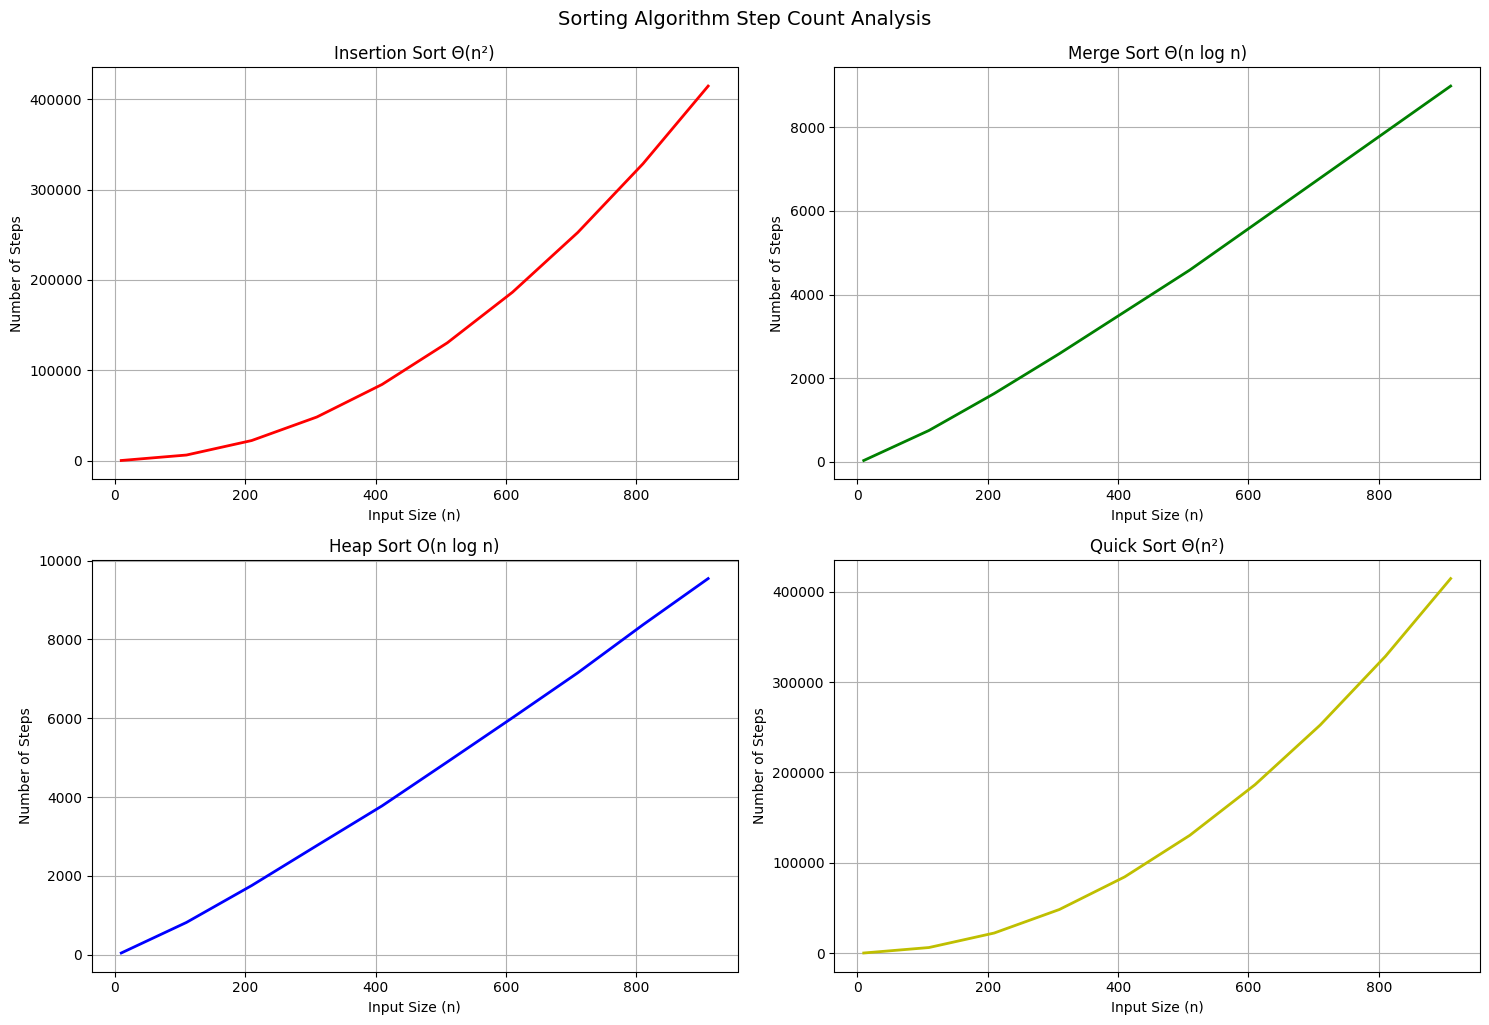

In [ ]:
sizes = [i for i in range(10, 10000, 100)]
steps_data = {
    'Insertion Sort': [],
    'Merge Sort': [],
    'Heap Sort': [],
    'Quick Sort': []
}

for n in sizes:
    # Generate same random array for all algorithms
    arr = [random.randint(1, 1000) for _ in range(n)]
    sorted_arr = list(range(n))
    
    # Test each algorithm
    _, merge_steps = merge_sort(arr.copy()) # Worst case n log n
    heap_steps = heap_sort(arr.copy()) # Worst case n log n
    insertion_steps = insertion_sort(sorted_arr[::-1]) # Worst case n² (reverse sorted array)
    quick_steps = quick_sort(sorted_arr) # Worst case n² (sorted or reverse sorted array)
    
    # Store results
    steps_data['Insertion Sort'].append(insertion_steps)
    steps_data['Merge Sort'].append(merge_steps)
    steps_data['Heap Sort'].append(heap_steps)
    steps_data['Quick Sort'].append(quick_steps)

plt.figure(figsize=(15, 10))

# Create a 2x2 grid of subplots
# Insertion Sort
plt.subplot(2, 2, 1)
plt.plot(sizes, steps_data['Insertion Sort'], 'r-', linewidth=2)
plt.title('Insertion Sort Θ(n²)')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.grid(True)

# Merge Sort
plt.subplot(2, 2, 2)
plt.plot(sizes, steps_data['Merge Sort'], 'g-', linewidth=2)
plt.title('Merge Sort Θ(n log n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.grid(True)

# Heap Sort
plt.subplot(2, 2, 3)
plt.plot(sizes, steps_data['Heap Sort'], 'b-', linewidth=2)
plt.title('Heap Sort O(n log n)')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.grid(True)

# Quick Sort
plt.subplot(2, 2, 4)
plt.plot(sizes, steps_data['Quick Sort'], 'y-', linewidth=2)
plt.title('Quick Sort Θ(n²)')
plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a main title to the figure
plt.suptitle('Sorting Algorithm Step Count Analysis', y=1.02, fontsize=14)

plt.show()